In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
folder_path = '/content/drive/My Drive/output'

In [38]:
import os

folder_path = '/content/drive/My Drive/output'
files = os.listdir(folder_path)
print(len(files))

490


In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("label.csv")

In [41]:
df.head()

,Index,Image File Name,Yes/No,doc value,RPM Value
0,1,T1_1000doc_114RPM_05_02_24 (2).bmp,False,1000,114
1,2,T1_1000doc_114RPM_05_02_24 (3).bmp,False,1000,114
2,3,T1_1000doc_114RPM_05_02_24 (4).bmp,False,1000,114
3,4,T1_1000doc_114RPM_05_02_24.bmp,False,1000,114
4,5,T1_1000doc_148RPM_03_02_24 (2).bmp,False,1000,148


In [42]:
df.columns

Index(['Index', 'Image File Name', 'Yes/No', 'doc value', 'RPM Value'], dtype='object')

In [43]:
df['Yes/No'] = df['Yes/No'].astype(int)

In [44]:
df.head()

,Index,Image File Name,Yes/No,doc value,RPM Value
0,1,T1_1000doc_114RPM_05_02_24 (2).bmp,0,1000,114
1,2,T1_1000doc_114RPM_05_02_24 (3).bmp,0,1000,114
2,3,T1_1000doc_114RPM_05_02_24 (4).bmp,0,1000,114
3,4,T1_1000doc_114RPM_05_02_24.bmp,0,1000,114
4,5,T1_1000doc_148RPM_03_02_24 (2).bmp,0,1000,148


In [45]:
import os
import cv2

# Define the folder path where the images are located
folder_path = '/content/drive/My Drive/output'

# Create a new column in the DataFrame to store the images
df['Image'] = df['Image File Name'].apply(lambda x: cv2.imread(os.path.join(folder_path, x)))

# Display the updated DataFrame
print(df)


     Index                     Image File Name  Yes/No  doc value  RPM Value  \
0        1  T1_1000doc_114RPM_05_02_24 (2).bmp       0       1000        114   
1        2  T1_1000doc_114RPM_05_02_24 (3).bmp       0       1000        114   
2        3  T1_1000doc_114RPM_05_02_24 (4).bmp       0       1000        114   
3        4      T1_1000doc_114RPM_05_02_24.bmp       0       1000        114   
4        5  T1_1000doc_148RPM_03_02_24 (2).bmp       0       1000        148   
..     ...                                 ...     ...        ...        ...   
485    486    T3_400doc_420RPM_21_1_24 (6).bmp       0        400        420   
486    487    T3_400doc_420RPM_21_1_24 (7).bmp       0        400        420   
487    488    T3_400doc_420RPM_21_1_24 (8).bmp       0        400        420   
488    489    T3_400doc_420RPM_21_1_24 (9).bmp       0        400        420   
489    490        T3_400doc_420RPM_21_1_24.bmp       0        400        420   

                                       

In [46]:
df['Image Path'] = df['Image File Name'].apply(lambda x: os.path.join(folder_path, x))

In [47]:
df.head()

,Index,Image File Name,Yes/No,doc value,RPM Value,Image,Image Path
0,1,T1_1000doc_114RPM_05_02_24 (2).bmp,0,1000,114,"[[[235, 239, 241], [209, 237, 249], [230, 239,...",/content/drive/My Drive/output/T1_1000doc_114R...
1,2,T1_1000doc_114RPM_05_02_24 (3).bmp,0,1000,114,"[[[1, 14, 21], [47, 72, 101], [24, 39, 50], [0...",/content/drive/My Drive/output/T1_1000doc_114R...
2,3,T1_1000doc_114RPM_05_02_24 (4).bmp,0,1000,114,"[[[215, 230, 231], [214, 226, 225], [205, 223,...",/content/drive/My Drive/output/T1_1000doc_114R...
3,4,T1_1000doc_114RPM_05_02_24.bmp,0,1000,114,"[[[66, 97, 119], [57, 89, 117], [68, 100, 137]...",/content/drive/My Drive/output/T1_1000doc_114R...
4,5,T1_1000doc_148RPM_03_02_24 (2).bmp,0,1000,148,"[[[240, 238, 240], [240, 238, 240], [240, 238,...",/content/drive/My Drive/output/T1_1000doc_148R...


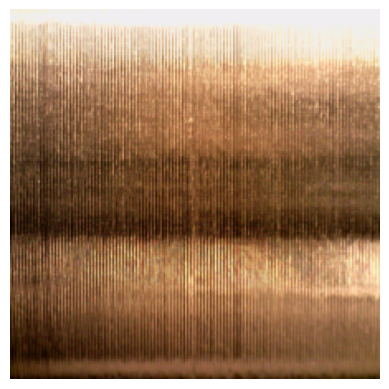

In [14]:
import matplotlib.pyplot as plt

# Select the row index for the image you want to display
index = 0  # Change this index to display a different image

# Get the image array from the 'Image' column of the DataFrame
image = df.loc[index, 'Image']

# Convert the image from BGR to RGB (since OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis labels
plt.show()

In [15]:
# Normalize the pixel values of the images in the 'Image' column
df['Image'] = df['Image'].apply(lambda img: img / 255.0 if img is not None else None)

In [49]:
df.rename(columns={'Yes/No': 'Chatter'}, inplace=True)

In [50]:
df['Image'].head()

,Image
0,"[[[235, 239, 241], [209, 237, 249], [230, 239,..."
1,"[[[1, 14, 21], [47, 72, 101], [24, 39, 50], [0..."
2,"[[[215, 230, 231], [214, 226, 225], [205, 223,..."
3,"[[[66, 97, 119], [57, 89, 117], [68, 100, 137]..."
4,"[[[240, 238, 240], [240, 238, 240], [240, 238,..."


In [51]:
df['Chatter'].sum()

218

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalAveragePooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [53]:
# Function to verify image paths
def verify_image_paths(df):
    missing_files = []
    for idx, row in df.iterrows():
        if not os.path.exists(row['Image Path']):
            missing_files.append(row['Image Path'])
    return missing_files

missing_files = verify_image_paths(df)
print(f"Number of missing image files: {len(missing_files)}")
if len(missing_files) > 0:
    print("Missing Files:")
    for file in missing_files:
        print(file)
    # Optionally, remove rows with missing files
    df = df[~df['Image Path'].isin(missing_files)]
else:
    print("All image paths are valid.")


Number of missing image files: 0
All image paths are valid.


In [54]:

# Define image parameters
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)
IMAGE_CHANNELS = 3  # RGB

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    try:
        img = load_img(image_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)  # VGG-19 preprocessing
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Apply the function to all image paths
print("Loading and preprocessing images...")
df['Processed_Image'] = df['Image Path'].apply(load_and_preprocess_image)

# Check for any images that failed to load
invalid_images = df['Processed_Image'].isnull().sum()
print(f"Number of images failed to load: {invalid_images}")

# Remove rows with failed image loading
if invalid_images > 0:
    df = df.dropna(subset=['Processed_Image']).reset_index(drop=True)
    print(f"Dataset shape after removing invalid images: {df.shape}")


Loading and preprocessing images...
Number of images failed to load: 0


In [55]:
len(df['Processed_Image'])

490

In [56]:
print("Sample Image Paths:")
print(df['Image Path'].head())


Sample Image Paths:
0    /content/drive/My Drive/output/T1_1000doc_114R...
1    /content/drive/My Drive/output/T1_1000doc_114R...
2    /content/drive/My Drive/output/T1_1000doc_114R...
3    /content/drive/My Drive/output/T1_1000doc_114R...
4    /content/drive/My Drive/output/T1_1000doc_148R...
Name: Image Path, dtype: object


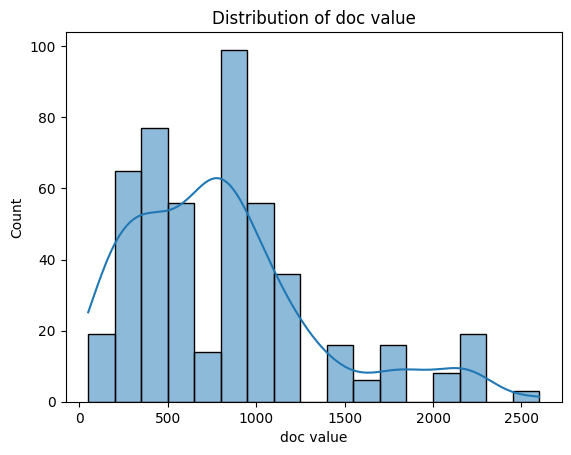

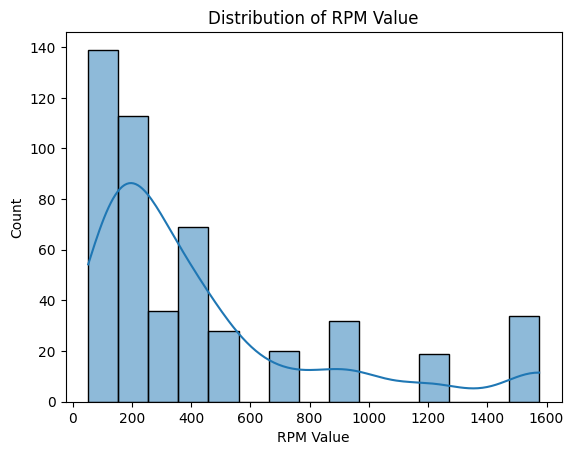

In [57]:
numerical_features = ['doc value', 'RPM Value']
X_numerical = df[numerical_features].values

# Optionally, visualize the numerical features
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [60]:
X_images = np.stack(df['Processed_Image'].values)
y = df['Chatter'].values

X_train_img, X_test_img, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_images, X_numerical, y,
    test_size=0.03, #TO CHANGE TO 0.2
    random_state=42,
    stratify=y
)

print(f"Training samples: {X_train_img.shape[0]}")
print(f"Testing samples: {X_test_img.shape[0]}")


Training samples: 475
Testing samples: 15


In [61]:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

print("First 5 rows of scaled numerical features:")
print(X_train_num_scaled[:5])

First 5 rows of scaled numerical features:
[[-0.76476375 -0.80260506]
 [-1.32709004 -0.07428967]
 [ 2.23430979 -0.72168113]
 [-0.01499537 -0.61695604]
 [-1.13964794  1.80600169]]


In [62]:
# Define the image input
image_input = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), name='Image_Input')

# Load the VGG-19 model without the top classification layers
vgg_base = VGG19(weights='imagenet', include_top=False, input_tensor=image_input)

# Freeze the VGG-19 base
vgg_base.trainable = False

# Add custom layers on top of VGG-19
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0)(x)

# Define the numerical input
numerical_input = Input(shape=(X_train_num_scaled.shape[1],), name='Numerical_Input')
n = Dense(32, activation='relu')(numerical_input)
n = Dropout(0)(n)

# Concatenate image features and numerical features
combined = concatenate([x, n])

# Add final classification layers
combined = Dense(256, activation='relu')(combined)
combined = Dropout(0)(combined)
output = Dense(1, activation='sigmoid', name='Output')(combined)

# Define the model with two inputs and one output
model = Model(inputs=[image_input, numerical_input], outputs=output)

# Display the model architecture
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Image_Input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ Image_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv4 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv4 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)

 Total params: 20,426,913 (77.92 MB)

 Trainable params: 402,529 (1.54 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'vgg19_chatter_multi_input_model.keras',  # Changed extension to .keras
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
epochs = 20

history = model.fit(
    [X_train_img, X_train_num_scaled],
    y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.5126 - loss: 0.9652 
Epoch 1: val_loss improved from inf to 0.48021, saving model to vgg19_chatter_multi_input_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 354s 30s/step - accuracy: 0.5175 - loss: 0.9559 - val_accuracy: 0.7579 - val_loss: 0.4802
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.8535 - loss: 0.3927 
Epoch 2: val_loss improved from 0.48021 to 0.35016, saving model to vgg19_chatter_multi_input_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 390s 30s/step - accuracy: 0.8529 - loss: 0.3921 - val_accuracy: 0.8316 - val_loss: 0.3502
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.8755 - loss: 0.2905 
Epoch 3: val_loss improved from 0.35016 to 0.31050, saving model to vgg19_chatter_multi_input_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 360s 28s/step - accuracy: 0.8756 - loss: 0.2895 - val_accuracy: 0.8316 - val_loss: 0.3105
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.9004 - loss: 0.2

In [66]:
# Save the entire model using the Keras native format
model.save('/content/drive/MyDrive/vgg19_chatter_multi_input_model.keras')

In [67]:
# Save only the weights using the HDF5 format (legacy)
model.save_weights('/content/drive/MyDrive/vgg19_chatter_multi_input_weights.weights.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(image_path, numerical_features, model, scaler):
    # Load and preprocess the image
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Scale numerical features
    numerical_scaled = scaler.transform([numerical_features])

    # Predict
    prediction = model.predict([img_array, numerical_scaled])
    return 'Chatter' if prediction[0][0] > 0.5 else 'Non-Chatter'

# Example usage
new_image_path = '/content/drive/MyDrive/output/new_image.bmp'
new_numerical_features = [1000, 114]  # Replace with actual values
prediction = predict_image(new_image_path, new_numerical_features, model, scaler)
print(f"The predicted class is: {prediction}")
